<a href="https://colab.research.google.com/github/juanjose1919/Proyectos-segundo-corte/blob/main/Proyecto_9_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geihdanepy
import geihdanepy as geih
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wooldridge shap
import shap
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.2 MB/s 
     |████████████████████████████████| 569 kB 35.4 MB/s 


#Exploración inicial de los datos

In [2]:
df_1 = geih.datos(2021,'junio','Caracteristicas','Cabecera')
df_2 = geih.datos(2021,'junio','Ocupados','Cabecera')


Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
pd.options.display.max_columns = None
df_1

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,P6020,P6030S1,P6030S3,P6040,P6050,P6080,P6080S1,P6070,P6081,P6081S1,P6083,P6083S1,P6071,P6071S1,P3147S1,P3147S2,P3147S3,P3147S4,P3147S5,P3147S6,P3147S7,P3147S8,P3147S9,P3147S10,P3147S11,P3147S10A1,P3246,P6090,P6140,P6150,P6100,P6110,P6120,P6125,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,AREA,CLASE,ESC,MES,DPTO,fex_c_2011
0,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116"
1,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116"
2,5468958,1,3,1,10,3,2,11,1967,53,5,5,,6,3,,2,,,,,,1,1,,,,,,,,,,1,,,3,,,2,1,2,,3,3,,,05,1,3,6,5,"1442,39108680116"
3,5468958,1,4,1,10,4,1,8,2006,14,5,5,,6,3,,2,,,,,,,,,,,1,,,,,,1,,,3,,,2,1,1,1,4,8,,,05,1,8,6,5,"1442,39108680116"
4,5468958,1,5,1,10,5,1,1,2007,14,5,5,,6,2,,2,,,,,,,,,,,1,,,,,,1,,,1,5,,2,1,1,1,4,8,,,05,1,8,6,5,"1442,39108680116"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,5494047,1,2,1,10,2,1,7,1983,37,2,6,,2,3,,2,,1,1,,,,,,,,,,,1,,,2,1,12,,,,9,1,2,,3,5,,,66,1,5,6,66,"422,469753006258"
53388,5494047,1,3,1,10,3,2,7,1999,22,3,6,,6,1,2,1,1,,,,,,,,,,,,,1,,,2,1,12,,,,2,1,2,,5,11,2,,66,1,11,6,66,"422,469753006258"
53389,5494047,1,4,1,10,4,2,7,2001,20,3,6,,6,1,2,1,1,,,,,,,,,,,,,1,,,2,1,12,,,,2,1,2,,5,11,2,,66,1,11,6,66,"422,469753006258"
53390,5494047,1,5,1,10,1,2,11,2009,11,3,6,,6,1,2,1,1,,,,,,,,,,,,,1,,,2,1,6,,,,2,1,2,,3,5,,,66,1,5,6,66,"422,469753006258"


In [4]:
pd.options.display.max_columns = None
df_2

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,AREA,CLASE,P388,P6440,P6450,P6460,P6460S1,P6400,P6410,P6410S1,P6422,P6424S1,P6424S2,P6424S3,P6426,P6430S1,P6480,P6480S1,P9440,P6500,P6510,P6510S1,P6510S2,P6590,P6590S1,P6600,P6600S1,P6610,P6610S1,P6620,P6620S1,P6585S1,P6585S1A1,P6585S1A2,P6585S2,P6585S2A1,P6585S2A2,P6585S3,P6585S3A1,P6585S3A2,P6585S4,P6585S4A1,P6585S4A2,P6545,P6545S1,P6545S2,P6580,P6580S1,P6580S2,P6630S1,P6630S1A1,P6630S2,P6630S2A1,P6630S3,P6630S3A1,P6630S4,P6630S4A1,P6630S6,P6630S6A1,P6640,P6640S1,P6765,P6765S1,P6772,P6772S1,P6773S1,P6775,P6750,P6760,P550,P6780,P6780S1,P6790,P1800,P1800S1,P1801S1,P1801S2,P1801S3,P1802,P1879,P1805,P6800,P6810,P6810S1,P6850,P6830,P6830S1,P6870,P6880,P6880S1,P6915,P6915S1,P6920,P6930,P6940,P6960,P6980,P6980S1,P6980S2,P6980S3,P6980S4,P6980S5,P6980S6,P6980S7,P6980S7A1,P6980S8,P6990,P9450,P7020,P760,P7026,P7028,P7028S1,P7040,P390,P7045,P7050,P7050S1,P7070,P7075,P7077,P1880,P1881,P1882,P3148,P7090,P7100,P7110,P7120,P7130,P7140,P7140S1,P7140S2,P7140S3,P7140S4,P7140S5,P7140S6,P7140S7,P7140S8,P7140S9,P7140S9A1,P7150,P7160,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,P7240S1,OFICIO,RAMA2D_R4,OCI,MES,P6430,RAMA4D_R4,INGLABO,DPTO,fex_c_2011,RAMA4DP8_R4
0,5468958,1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
1,5468958,1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
2,5468959,1,2,1,60,5,1,5,1,2,2,12,1,,,1,1,2,1,96,,5,,1,1000000,2,,,2,,2,,2,,2,,2,,,1,106454,2,2,,,2,,,2,,,2,,,1,1000000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,9,7,,1,,1,1,1,8,1,1,,,,,,,,,1,1,2,,,,,2,,,,,,,,,2,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,1,,39,85,1,6,1,8541,1000000,5,"867,171073921304",
3,5468960,1,1,1,60,5,1,5,1,2,2,3,1,,,1,1,2,1,1,,1,,2,908526,2,,,2,,2,,2,,2,,2,,,1,106454,2,2,,,2,,,2,,,2,,,2,,2,,2,,2,,2,,2,,,.,,,,,,,,,.,1,,,,,,,,,48,,.,48,,,9,7,,1,,1,1,1,0,1,1,,,,,,,,,1,1,1,72,24,1,,2,,,,,,,,1,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,8,,39,22,1,6,1,2229,908526,5,"1195,30537084732",
4,5468960,1,2,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,4,,1,,2,1000000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,38000,2,2,,,2,,,2,,,1,980000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,7,9,,1,,1,1,1,15,1,1,,,,,,,,,1,1,1,0,24,1,,2,,,,,,,,1,4,90,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,8,,95,41,1,6,1,4112,1000000,5,"1195,30537084732",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5494047,1,1,1,60,66,1,66,1,1,,,1,,,1,2,2,2,7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3,,,,,3,800000,1,,3,,12,2,,,,,3,1,2,48,,.,40,2,,6,7,,10,,2,,,,1,,,,,,,,,1,2,2,1,0,24,1,,2,,,,,,,,1,3,10,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,79,14,1,6,4,1410,800000,66,"422,469753006258",
21579,5494047,1,2,1,60,66,1,66,1,1,,,1,,,1,2,2,2,1,,1,,2,850000,2,,,2,,2,,2,,2,,2,,,2,,,2,,,2,,,2,,,2,,,2,,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,44,2,,3,7,,11,,2,,,,1,,,,,,,,,1,2,2,1,0,12,4,,2,,,,,,,,8,3,30,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,45,47,1,6,1,4752,850000,66,"422,469753006258",
21580,5494047,1,3,1,60,66,

In [5]:
df_3 = (pd.merge(df_1,df_2,on='DIRECTORIO'))

In [6]:
df_3

,DIRECTORIO,SECUENCIA_P_x,ORDEN_x,HOGAR_x,REGIS_x,P6016,P6020,P6030S1,P6030S3,P6040,P6050,P6080,P6080S1,P6070,P6081,P6081S1,P6083,P6083S1,P6071,P6071S1,P3147S1,P3147S2,P3147S3,P3147S4,P3147S5,P3147S6,P3147S7,P3147S8,P3147S9,P3147S10,P3147S11,P3147S10A1,P3246,P6090,P6140,P6150,P6100,P6110,P6120,P6125,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,AREA_x,CLASE_x,ESC,MES_x,DPTO_x,fex_c_2011_x,SECUENCIA_P_y,ORDEN_y,HOGAR_y,REGIS_y,AREA_y,CLASE_y,P388,P6440,P6450,P6460,P6460S1,P6400,P6410,P6410S1,P6422,P6424S1,P6424S2,P6424S3,P6426,P6430S1,P6480,P6480S1,P9440,P6500,P6510,P6510S1,P6510S2,P6590,P6590S1,P6600,P6600S1,P6610,P6610S1,P6620,P6620S1,P6585S1,P6585S1A1,P6585S1A2,P6585S2,P6585S2A1,P6585S2A2,P6585S3,P6585S3A1,P6585S3A2,P6585S4,P6585S4A1,P6585S4A2,P6545,P6545S1,P6545S2,P6580,P6580S1,P6580S2,P6630S1,P6630S1A1,P6630S2,P6630S2A1,P6630S3,P6630S3A1,P6630S4,P6630S4A1,P6630S6,P6630S6A1,P6640,P6640S1,P6765,P6765S1,P6772,P6772S1,P6773S1,P6775,P6750,P6760,P550,P6780,P6780S1,P6790,P1800,P1800S1,P1801S1,P1801S2,P1801S3,P1802,P1879,P1805,P6800,P6810,P6810S1,P6850,P6830,P6830S1,P6870,P6880,P6880S1,P6915,P6915S1,P6920,P6930,P6940,P6960,P6980,P6980S1,P6980S2,P6980S3,P6980S4,P6980S5,P6980S6,P6980S7,P6980S7A1,P6980S8,P6990,P9450,P7020,P760,P7026,P7028,P7028S1,P7040,P390,P7045,P7050,P7050S1,P7070,P7075,P7077,P1880,P1881,P1882,P3148,P7090,P7100,P7110,P7120,P7130,P7140,P7140S1,P7140S2,P7140S3,P7140S4,P7140S5,P7140S6,P7140S7,P7140S8,P7140S9,P7140S9A1,P7150,P7160,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,P7240S1,OFICIO,RAMA2D_R4,OCI,MES_y,P6430,RAMA4D_R4,INGLABO,DPTO_y,fex_c_2011_y,RAMA4DP8_R4
0,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
1,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116",1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
2,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
3,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116",1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
4,5468958,1,3,1,10,3,2,11,1967,53,5,5,,6,3,,2,,,,,,1,1,,,,,,,,,,1,,,3,,,2,1,2,,3,3,,,05,1,3,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
df_3.isna().sum()

DIRECTORIO       0
SECUENCIA_P_x    0
ORDEN_x          0
HOGAR_x          0
REGIS_x          0
                ..
RAMA4D_R4        0
INGLABO          0
DPTO_y           0
fex_c_2011_y     0
RAMA4DP8_R4      0
Length: 218, dtype: int64

In [8]:
df_3

,DIRECTORIO,SECUENCIA_P_x,ORDEN_x,HOGAR_x,REGIS_x,P6016,P6020,P6030S1,P6030S3,P6040,P6050,P6080,P6080S1,P6070,P6081,P6081S1,P6083,P6083S1,P6071,P6071S1,P3147S1,P3147S2,P3147S3,P3147S4,P3147S5,P3147S6,P3147S7,P3147S8,P3147S9,P3147S10,P3147S11,P3147S10A1,P3246,P6090,P6140,P6150,P6100,P6110,P6120,P6125,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,AREA_x,CLASE_x,ESC,MES_x,DPTO_x,fex_c_2011_x,SECUENCIA_P_y,ORDEN_y,HOGAR_y,REGIS_y,AREA_y,CLASE_y,P388,P6440,P6450,P6460,P6460S1,P6400,P6410,P6410S1,P6422,P6424S1,P6424S2,P6424S3,P6426,P6430S1,P6480,P6480S1,P9440,P6500,P6510,P6510S1,P6510S2,P6590,P6590S1,P6600,P6600S1,P6610,P6610S1,P6620,P6620S1,P6585S1,P6585S1A1,P6585S1A2,P6585S2,P6585S2A1,P6585S2A2,P6585S3,P6585S3A1,P6585S3A2,P6585S4,P6585S4A1,P6585S4A2,P6545,P6545S1,P6545S2,P6580,P6580S1,P6580S2,P6630S1,P6630S1A1,P6630S2,P6630S2A1,P6630S3,P6630S3A1,P6630S4,P6630S4A1,P6630S6,P6630S6A1,P6640,P6640S1,P6765,P6765S1,P6772,P6772S1,P6773S1,P6775,P6750,P6760,P550,P6780,P6780S1,P6790,P1800,P1800S1,P1801S1,P1801S2,P1801S3,P1802,P1879,P1805,P6800,P6810,P6810S1,P6850,P6830,P6830S1,P6870,P6880,P6880S1,P6915,P6915S1,P6920,P6930,P6940,P6960,P6980,P6980S1,P6980S2,P6980S3,P6980S4,P6980S5,P6980S6,P6980S7,P6980S7A1,P6980S8,P6990,P9450,P7020,P760,P7026,P7028,P7028S1,P7040,P390,P7045,P7050,P7050S1,P7070,P7075,P7077,P1880,P1881,P1882,P3148,P7090,P7100,P7110,P7120,P7130,P7140,P7140S1,P7140S2,P7140S3,P7140S4,P7140S5,P7140S6,P7140S7,P7140S8,P7140S9,P7140S9A1,P7150,P7160,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,P7240S1,OFICIO,RAMA2D_R4,OCI,MES_y,P6430,RAMA4D_R4,INGLABO,DPTO_y,fex_c_2011_y,RAMA4DP8_R4
0,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
1,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116",1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
2,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
3,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116",1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
4,5468958,1,3,1,10,3,2,11,1967,53,5,5,,6,3,,2,,,,,,1,1,,,,,,,,,,1,,,3,,,2,1,2,,3,3,,,05,1,3,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [9]:
df_3.describe()

,DIRECTORIO,SECUENCIA_P_x,ORDEN_x,HOGAR_x,REGIS_x,P6016,P6020,P6040,P6050,P6080,P6081,P6083,P6090,P6125,CLASE_x,MES_x,DPTO_x,SECUENCIA_P_y,ORDEN_y,HOGAR_y,REGIS_y,CLASE_y,P388,P6440,P6426,P6790,P6800,P6850,P6870,P6880,P6915,P6990,P9450,P7020,P7040,P1881,P7090,P7130,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,OFICIO,RAMA2D_R4,OCI,MES_y,P6430,RAMA4D_R4,DPTO_y
count,8.320500e+04,83205.000000,83205.000000,83205.000000,83205.0,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.0,83205.0,83205.000000,83205.000000,83205.000000,83205.000000,83205.0,83205.0,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.000000,83205.0,83205.0,83205.000000,83205.000000,83205.000000
mean,5.481275e+06,1.019819,2.865333,1.019819,10.0,2.322757,1.516327,32.994616,2.716724,5.855562,2.053302,1.752575,1.098323,1.981155,1.0,6.0,36.107181,1.022571,2.256679,1.022571,60.0,1.0,36.103335,1.476486,74.553633,10.580867,44.720449,41.794039,3.894357,5.187224,2.225780,1.619855,1.716844,1.237041,1.974965,7.753032,1.902446,1.732961,1.153981,1.400541,1.181816,1.972285,1.329055,1.092314,4.157106,55.744487,56.491990,1.0,6.0,2.803533,5677.707554,36.107181
std,7.472568e+03,0.178205,1.867865,0.178205,0.0,1.636816,0.499736,20.264763,1.527858,0.680959,0.753361,0.767261,0.372105,0.235600,0.0,0.0,24.301459,0.197261,1.633169,0.197261,0.0,0.0,25.784069,0.499450,103.363170,2.864157,14.333229,16.681944,3.299515,2.500448,2.189731,0.517633,0.528238,0.425270,0.156231,4.813220,0.296713,0.442416,0.360933,0.490011,0.385695,0.164155,0.469873,0.289471,2.302635,28.496037,23.824724,0.0,0.0,1.571507,2378.568992,24.301459
min,5.468958e+06,1.000000,1.000000,1.000000,10.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,6.0,5.000000,1.000000,1.000000,1.000000,60.0,1.0,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,6.0,1.000000,111.000000,5.000000
25%,5.475008e+06,1.000000,1.000000,1.000000,10.0,1.000000,1.000000,17.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,1.0,6.0,13.000000,1.000000,1.000000,1.000000,60.0,1.0,13.000000,1.000000,8.000000,11.000000,40.000000,35.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,39.000000,45.000000,1.0,6.0,1.000000,4520.000000,13.000000
50%,5.481383e+06,1.000000,2.000000,1.000000,10.0,2.000000,2.000000,30.000000,3.000000,6.000000,2.000000,2.000000,1.000000,2.000000,1.0,6.0,27.000000,1.000000,2.000000,1.000000,60.0,1.0,27.000000,1.000000,28.000000,12.000000,48.000000,48.000000,2.000000,7.000000,2.000000,2.000000,2.000000,1.000000,2.000000,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,53.000000,49.000000,1.0,6.0,4.000000,4921.000000,27.000000
75%,5.487491e+06,1.000000,4.000000,1.000000,10.0,3.000000,2.000000,48.000000,3.000000,6.000000,3.000000,2.000000,1.000000,2.000000,1.0,6.0,54.000000,1.000000,3.000000,1.000000,60.0,1.0,54.000000,2.000000,96.000000,12.000000,48.000000,48.000000,8.000000,7.000000,2.000000,2.000000,2.000000,1.000000,2.000000,12.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,5.000000,83.000000,81.000000,1.0,6.0,4.000000,8121.000000,54.000000
max,5.494047e+06,5.000000,19.000000,5.000000,10.0,19.000000,2.000000,105.000000,9.000000,6.000000,3.000000,3.000000,9.000000,9.000000,1.0,6.0,76.000000,5.000000,17.000000,5.000000,60.0,1.0,900.000000,2.000000,780.000000,12.000000,130.000000,126.000000,9.000000,11.000

In [10]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83205 entries, 0 to 83204
Columns: 218 entries, DIRECTORIO to RAMA4DP8_R4
dtypes: int64(52), object(166)
memory usage: 139.0+ MB


In [11]:
df_3.tail()

,DIRECTORIO,SECUENCIA_P_x,ORDEN_x,HOGAR_x,REGIS_x,P6016,P6020,P6030S1,P6030S3,P6040,P6050,P6080,P6080S1,P6070,P6081,P6081S1,P6083,P6083S1,P6071,P6071S1,P3147S1,P3147S2,P3147S3,P3147S4,P3147S5,P3147S6,P3147S7,P3147S8,P3147S9,P3147S10,P3147S11,P3147S10A1,P3246,P6090,P6140,P6150,P6100,P6110,P6120,P6125,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,AREA_x,CLASE_x,ESC,MES_x,DPTO_x,fex_c_2011_x,SECUENCIA_P_y,ORDEN_y,HOGAR_y,REGIS_y,AREA_y,CLASE_y,P388,P6440,P6450,P6460,P6460S1,P6400,P6410,P6410S1,P6422,P6424S1,P6424S2,P6424S3,P6426,P6430S1,P6480,P6480S1,P9440,P6500,P6510,P6510S1,P6510S2,P6590,P6590S1,P6600,P6600S1,P6610,P6610S1,P6620,P6620S1,P6585S1,P6585S1A1,P6585S1A2,P6585S2,P6585S2A1,P6585S2A2,P6585S3,P6585S3A1,P6585S3A2,P6585S4,P6585S4A1,P6585S4A2,P6545,P6545S1,P6545S2,P6580,P6580S1,P6580S2,P6630S1,P6630S1A1,P6630S2,P6630S2A1,P6630S3,P6630S3A1,P6630S4,P6630S4A1,P6630S6,P6630S6A1,P6640,P6640S1,P6765,P6765S1,P6772,P6772S1,P6773S1,P6775,P6750,P6760,P550,P6780,P6780S1,P6790,P1800,P1800S1,P1801S1,P1801S2,P1801S3,P1802,P1879,P1805,P6800,P6810,P6810S1,P6850,P6830,P6830S1,P6870,P6880,P6880S1,P6915,P6915S1,P6920,P6930,P6940,P6960,P6980,P6980S1,P6980S2,P6980S3,P6980S4,P6980S5,P6980S6,P6980S7,P6980S7A1,P6980S8,P6990,P9450,P7020,P760,P7026,P7028,P7028S1,P7040,P390,P7045,P7050,P7050S1,P7070,P7075,P7077,P1880,P1881,P1882,P3148,P7090,P7100,P7110,P7120,P7130,P7140,P7140S1,P7140S2,P7140S3,P7140S4,P7140S5,P7140S6,P7140S7,P7140S8,P7140S9,P7140S9A1,P7150,P7160,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,P7240S1,OFICIO,RAMA2D_R4,OCI,MES_y,P6430,RAMA4D_R4,INGLABO,DPTO_y,fex_c_2011_y,RAMA4DP8_R4
83200,5494047,1,6,1,10,6,1,12,1987,33,5,6,,6,3,,2,,,,,,,,,,,,,,1,,,2,1,6,,,,2,1,2,,3,5,,,66,1,5,6,66,"422,469753006258",1,1,1,60,66,1,66,1,1,,,1,,,1,2,2,2,7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3,,,,,3,800000,1,,3,,12,2,,,,,3,1,2,48,,.,40,2,,6,7,,10,,2,,,,1,,,,,,,,,1,2,2,1,0,24,1,,2,,,,,,,,1,3,10,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,79,14,1,6,4,1410,800000,66,"422,469753006258",
83201,5494047,1,6,1,10,6,1,12,1987,33,5,6,,6,3,,2,,,,,,,,,,,,,,1,,,2,1,6,,,,2,1,2,,3,5,,,66,1,5,6,66,"422,469753006258",1,2,1,60,66,1,66,1,1,,,1,,,1,2,2,2,1,,1,,2,850000,2,,,2,,2,,2,,2,,2,,,2,,,2,,,2,,,2,,,2,,,2,,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,44,2,,3,7,,11,,2,,,,1,,,,,,,,,1,2,2,1,0,12,4,,2,,,,,,,,8,3,30,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,45,47,1,6,1,4752,850000,66,"422,469753006258",
83202,5494047,1,6,1,10,6,1,12,1987,33,5,6,,6,3,,2,,,,,,,,,,,,,,1,,,2,1,6,,,,2,1,2,,3,5,,,66,1,5,6,66,"422,469753006258",1,3,1,60,66,1,66,1,1,,,1,,,1,2,2,2,6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3,,,,,3,800000,1,,3,,6,2,,,,,1,1,2,48,,.,40,2,,6,7,,11,,2,,,,1,,,,,,,,,1,2,2,2,,,,,2,,,,,,,,,3,10,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,70,14,1,6,4,1410,800000,66,"422,469753006258",
83203,5494047,1,6,1,10,6,1,12,1987,33,5,6,,6,3,,2,,,,,,,,,,,,,,1,,,2,1,6,,,,2,1,2,,3,5,,,66,1,5,6,66,"422,469753006258",1,4,1,60,66,1,66,1,1,,,1,,,1,2,2,2,6,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3,,,,,3,750000,1,,3,,6,2,,,,,1,1,2,48,,.,40,2,,6,7,,11,,2,,,,1,1,,,,,,,,,1,1,2,,,,,2,,,,,,,,,3,10,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,79,14,1,6,4,1410,750000,66,"422,469753006258",
83204,5494047,1,6,1,10,6,1,12,1987,33,5,6,,6,3,,2,,,,,,,,,,,,,,1,,,2,1,6,,,,2,1,2,,3,5,,,66,1,5,6,66,"422,469753006258",1,6,1,60,66,1,66,1,1,,,1,,,1,2,2,2,6,,1,,2,850000,2,,,2,,2,,2,,2,,2,,,2,,,2,,,2,,,2,,,2,,,2,,2,,2,,2,,2,,2,,,.,,,,,,,,,.,10,,,,,,,,,48,,.,48,,,2,2,,11,,2,,,,1,,,,,,,,,1,2,2,1,2,6,1,,2,,,,,,,,1,3,38,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,97,41,1,6,1,4111,850000,66,"422,469753006258",


In [12]:
df_3.head()

,DIRECTORIO,SECUENCIA_P_x,ORDEN_x,HOGAR_x,REGIS_x,P6016,P6020,P6030S1,P6030S3,P6040,P6050,P6080,P6080S1,P6070,P6081,P6081S1,P6083,P6083S1,P6071,P6071S1,P3147S1,P3147S2,P3147S3,P3147S4,P3147S5,P3147S6,P3147S7,P3147S8,P3147S9,P3147S10,P3147S11,P3147S10A1,P3246,P6090,P6140,P6150,P6100,P6110,P6120,P6125,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,AREA_x,CLASE_x,ESC,MES_x,DPTO_x,fex_c_2011_x,SECUENCIA_P_y,ORDEN_y,HOGAR_y,REGIS_y,AREA_y,CLASE_y,P388,P6440,P6450,P6460,P6460S1,P6400,P6410,P6410S1,P6422,P6424S1,P6424S2,P6424S3,P6426,P6430S1,P6480,P6480S1,P9440,P6500,P6510,P6510S1,P6510S2,P6590,P6590S1,P6600,P6600S1,P6610,P6610S1,P6620,P6620S1,P6585S1,P6585S1A1,P6585S1A2,P6585S2,P6585S2A1,P6585S2A2,P6585S3,P6585S3A1,P6585S3A2,P6585S4,P6585S4A1,P6585S4A2,P6545,P6545S1,P6545S2,P6580,P6580S1,P6580S2,P6630S1,P6630S1A1,P6630S2,P6630S2A1,P6630S3,P6630S3A1,P6630S4,P6630S4A1,P6630S6,P6630S6A1,P6640,P6640S1,P6765,P6765S1,P6772,P6772S1,P6773S1,P6775,P6750,P6760,P550,P6780,P6780S1,P6790,P1800,P1800S1,P1801S1,P1801S2,P1801S3,P1802,P1879,P1805,P6800,P6810,P6810S1,P6850,P6830,P6830S1,P6870,P6880,P6880S1,P6915,P6915S1,P6920,P6930,P6940,P6960,P6980,P6980S1,P6980S2,P6980S3,P6980S4,P6980S5,P6980S6,P6980S7,P6980S7A1,P6980S8,P6990,P9450,P7020,P760,P7026,P7028,P7028S1,P7040,P390,P7045,P7050,P7050S1,P7070,P7075,P7077,P1880,P1881,P1882,P3148,P7090,P7100,P7110,P7120,P7130,P7140,P7140S1,P7140S2,P7140S3,P7140S4,P7140S5,P7140S6,P7140S7,P7140S8,P7140S9,P7140S9A1,P7150,P7160,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,P7240S1,OFICIO,RAMA2D_R4,OCI,MES_y,P6430,RAMA4D_R4,INGLABO,DPTO_y,fex_c_2011_y,RAMA4DP8_R4
0,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
1,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116",1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
2,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
3,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116",1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
4,5468958,1,3,1,10,3,2,11,1967,53,5,5,,6,3,,2,,,,,,1,1,,,,,,,,,,1,,,3,,,2,1,2,,3,3,,,05,1,3,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",


#Limpieza de los datos

In [13]:
df_3.duplicated().sum()

0

**Conclusión intermedia:** La base de datos no presenta duplicados, por lo que 
no es necesario llevar a cabo limpieza de datos en este aspecto

In [14]:
df_3.isna().sum()

DIRECTORIO       0
SECUENCIA_P_x    0
ORDEN_x          0
HOGAR_x          0
REGIS_x          0
                ..
RAMA4D_R4        0
INGLABO          0
DPTO_y           0
fex_c_2011_y     0
RAMA4DP8_R4      0
Length: 218, dtype: int64

In [15]:
df_3.isnull().sum()

DIRECTORIO       0
SECUENCIA_P_x    0
ORDEN_x          0
HOGAR_x          0
REGIS_x          0
                ..
RAMA4D_R4        0
INGLABO          0
DPTO_y           0
fex_c_2011_y     0
RAMA4DP8_R4      0
Length: 218, dtype: int64

#Análisis descriptivo y gráfico de los datos

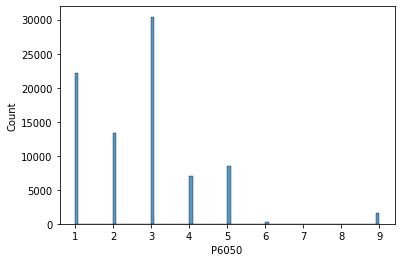

In [16]:
sns.histplot(data=df_3, x='P6050')

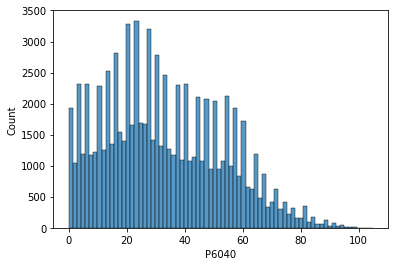

In [17]:
sns.histplot(data=df_3, x='P6040')

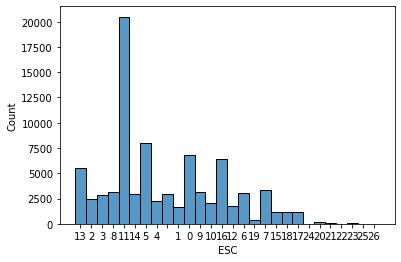

In [18]:
sns.histplot(data=df_3, x='ESC')

<BarContainer object of 3 artists>

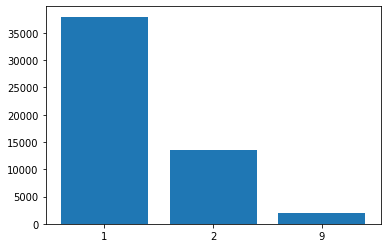

In [19]:
cat_2 = df_1['P6170'].value_counts()
cat_2.index = ['1','2','9']
plt.bar(cat_2.index, cat_2.values)

<BarContainer object of 3 artists>

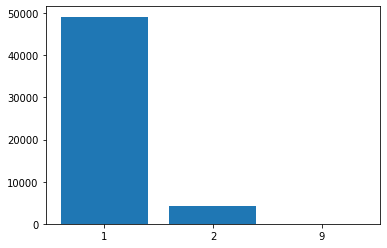

In [20]:
cat_3 = df_1['P6090'].value_counts()
cat_3.index = ['1','2','9']
plt.bar(cat_3.index, cat_3.values)

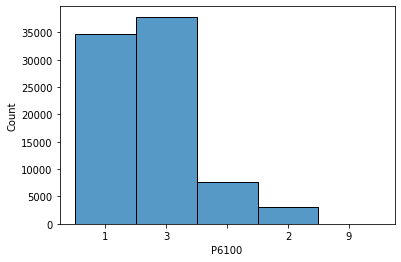

In [21]:
sns.histplot(data=df_3, x='P6100')

#Prepare los datos para el ajuste del algoritmo de random forest para regresión

In [22]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83205 entries, 0 to 83204
Columns: 218 entries, DIRECTORIO to RAMA4DP8_R4
dtypes: int64(52), object(166)
memory usage: 141.0+ MB


In [23]:
df_4=pd.DataFrame(df_3,columns=['P6050','P6040','ESC','P6170','P6120','P6090','P6100','INGLABO'])


In [24]:
df_4

,P6050,P6040,ESC,P6170,P6120,P6090,P6100,INGLABO
0,1,28,13,2,64000,1,1,1600000
1,1,28,13,2,64000,1,1,700000
2,3,8,2,1,,1,1,1600000
3,3,8,2,1,,1,1,700000
4,5,53,3,2,,1,3,1600000
...,...,...,...,...,...,...,...,...
83200,5,33,5,2,,2,,800000
83201,5,33,5,2,,2,,850000
83202,5,33,5,2,,2,,800000
83203,5,33,5,2,,2,,750000


In [25]:
df_4.to_csv('GEIH_caracteristicas.csv')

In [26]:
df_4.describe()

,P6050,P6040,P6090
count,83205.000000,83205.000000,83205.000000
mean,2.716724,32.994616,1.098323
std,1.527858,20.264763,0.372105
min,1.000000,0.000000,1.000000
25%,1.000000,17.000000,1.000000
50%,3.000000,30.000000,1.000000
75%,3.000000,48.000000,1.000000
max,9.000000,105.000000,9.000000


In [27]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83205 entries, 0 to 83204
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   P6050    83205 non-null  int64 
 1   P6040    83205 non-null  int64 
 2   ESC      83205 non-null  object
 3   P6170    83205 non-null  object
 4   P6120    83205 non-null  object
 5   P6090    83205 non-null  int64 
 6   P6100    83205 non-null  object
 7   INGLABO  83205 non-null  object
dtypes: int64(3), object(5)
memory usage: 7.7+ MB


In [28]:
df_4.isna().sum()

P6050      0
P6040      0
ESC        0
P6170      0
P6120      0
P6090      0
P6100      0
INGLABO    0
dtype: int64

In [29]:
df_2.isnull().sum()

DIRECTORIO     0
SECUENCIA_P    0
ORDEN          0
HOGAR          0
REGIS          0
              ..
RAMA4D_R4      0
INGLABO        0
DPTO           0
fex_c_2011     0
RAMA4DP8_R4    0
Length: 166, dtype: int64

In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21583 entries, 0 to 21582
Columns: 166 entries, DIRECTORIO to RAMA4DP8_R4
dtypes: int64(36), object(130)
memory usage: 27.3+ MB


In [31]:
df_4['P6100'] = pd.to_numeric(df_4['P6100'],errors = 'coerce')

In [32]:
df_4['ESC'] = pd.to_numeric(df_4['ESC'],errors = 'coerce')

In [33]:
df_4['INGLABO'] = pd.to_numeric(df_4['INGLABO'],errors = 'coerce')

In [34]:
df_4['P6170'] = pd.to_numeric(df_4['P6170'],errors = 'coerce')

In [35]:
df_4['P6120'] = pd.to_numeric(df_4['P6120'],errors = 'coerce')

In [36]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83205 entries, 0 to 83204
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   P6050    83205 non-null  int64  
 1   P6040    83205 non-null  int64  
 2   ESC      80223 non-null  float64
 3   P6170    80232 non-null  float64
 4   P6120    20658 non-null  float64
 5   P6090    83205 non-null  int64  
 6   P6100    75542 non-null  float64
 7   INGLABO  76288 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 7.7 MB


In [37]:
df_2.isnull().sum()

DIRECTORIO     0
SECUENCIA_P    0
ORDEN          0
HOGAR          0
REGIS          0
              ..
RAMA4D_R4      0
INGLABO        0
DPTO           0
fex_c_2011     0
RAMA4DP8_R4    0
Length: 166, dtype: int64

In [38]:
df_4.isna().sum()

P6050          0
P6040          0
ESC         2982
P6170       2973
P6120      62547
P6090          0
P6100       7663
INGLABO     6917
dtype: int64

In [39]:
P6120_not_null = df_4.drop(df_4[df_4.P6120.isnull()].index)
P6120_null = df_4.drop(P6120_not_null.index)
features = ['P6040','P6090','P6050']
y = P6120_not_null['P6120']
x = P6120_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = P6120_null[features]
predicted_P6120 = model.predict(x)
df_4.loc[df_4.P6120.isnull(), "P6120"] = predicted_P6120
df_4.P6120.isna().sum()

0

In [40]:
df_4['P6170'] = df_4['P6170'].round()

In [41]:
df_4['P6100'] = df_4['P6100'].round()

In [42]:
ESC_not_null = df_4.drop(df_4[df_4.ESC.isnull()].index)
ESC_null = df_4.drop(ESC_not_null.index)
features = ['P6050', 'P6040','P6090']
y = ESC_not_null['ESC']
x = ESC_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = ESC_null[features]
predicted_ESC = model.predict(x)
df_4.loc[df_4.ESC.isnull(), "ESC"] = predicted_ESC
df_4.ESC.isna().sum()

0

In [43]:
INGLABO_not_null = df_4.drop(df_4[df_4.INGLABO.isnull()].index)
INGLABO_null = df_4.drop(INGLABO_not_null.index)
features = ['P6050','P6040','P6090']
y = INGLABO_not_null['INGLABO']
x = INGLABO_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = INGLABO_null[features]
predicted_INGLABO = model.predict(x)
df_4.loc[df_4.INGLABO.isnull(), "INGLABO"] = predicted_INGLABO
df_4.INGLABO.isna().sum()

0

In [44]:
df_4['INGLABO'] = df_4['INGLABO'].round()

In [45]:
P6100_not_null = df_4.drop(df_4[df_4.P6100.isnull()].index)
P6100_null = df_4.drop(P6100_not_null.index)
features = ['P6050','P6040','P6090']
y = P6100_not_null['P6100']
x = P6100_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = P6100_null[features]
predicted_P6100 = model.predict(x)
df_4.loc[df_4.P6100.isnull(), "P6100"] = predicted_P6100
df_4.P6100.isna().sum()

0

In [46]:
P6170_not_null = df_4.drop(df_4[df_4.P6170.isnull()].index)
P6170_null = df_4.drop(P6170_not_null.index)
features = ['P6050','P6040','P6090']
y = P6170_not_null['P6170']
x = P6170_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = P6170_null[features]
predicted_P6170 = model.predict(x)
df_4.loc[df_4.P6170.isnull(), "P6170"] = predicted_P6170
df_4.P6170.isna().sum()

0

In [47]:
df_4.isna().sum()

P6050      0
P6040      0
ESC        0
P6170      0
P6120      0
P6090      0
P6100      0
INGLABO    0
dtype: int64

In [48]:
df_4.nunique()

P6050         9
P6040       105
ESC          56
P6170        27
P6120      1128
P6090         3
P6100       370
INGLABO    1355
dtype: int64

In [49]:
df_4

,P6050,P6040,ESC,P6170,P6120,P6090,P6100,INGLABO
0,1,28,13.0,2.0,64000.000000,1,1.00000,1600000.0
1,1,28,13.0,2.0,64000.000000,1,1.00000,700000.0
2,3,8,2.0,1.0,32368.754438,1,1.00000,1600000.0
3,3,8,2.0,1.0,32368.754438,1,1.00000,700000.0
4,5,53,3.0,2.0,83738.814243,1,3.00000,1600000.0
...,...,...,...,...,...,...,...,...
83200,5,33,5.0,2.0,56982.791116,2,2.23179,800000.0
83201,5,33,5.0,2.0,56982.791116,2,2.23179,850000.0
83202,5,33,5.0,2.0,56982.791116,2,2.23179,800000.0
83203,5,33,5.0,2.0,56982.791116,2,2.23179,750000.0


#Optimización de hiperparámetros

In [50]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_regression, make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

In [51]:
X = df_4.drop(['INGLABO'],axis=1)

In [52]:
y = df_4.INGLABO

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)  

In [54]:
RF_model = RandomForestRegressor(max_depth=4, n_estimators=20)
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=20)

#Entrenamiento del modelo con la variable salario como variable objetivo

In [55]:
RF_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=20)

In [56]:
RF_model.score(X_test,y_test)

0.207330554073905

In [68]:
y_fit_train = RF_model.predict(X_train)
y_pred = RF_model.predict(X_test)

In [63]:
y_fit_train = RF_model.predict(X_train)
y_pred = RF_model.predict(np.array([2,2,2,2,2,2,2]).reshape(1,7))

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


#Evalúe las métricas

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [69]:
def metricas(y_true, y_pred):
  print(f'MSE: {mean_squared_error(y_true, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE: {np.sqrt(mean_squared_error(y_true,y_pred))}')

In [70]:
print('Métricas del entrenamiento',end='\n')
print('---'*10)
metricas(y_train, y_fit_train)
print('---'*10)
print('Métricas del testeo')
print('---'*10)
metricas(y_test, y_pred)

Métricas del entrenamiento
------------------------------
MSE: 1248514569764.7786
MAE: 523252.882940104
RMSE: 1117369.4866805603
------------------------------
Métricas del testeo
------------------------------
MSE: 1090164711072.0858
MAE: 532901.3002852794
RMSE: 1044109.5302084383


In [71]:
X_train

,P6050,P6040,ESC,P6170,P6120,P6090,P6100
58163,2,24,16.0,2.0,36341.000000,1,1.000000
44244,5,55,5.0,2.0,86414.416556,2,2.219804
54080,3,23,0.0,2.0,52435.771783,1,3.000000
15332,3,27,11.0,2.0,57786.976409,1,3.000000
29494,1,70,3.0,2.0,248000.000000,1,1.000000
...,...,...,...,...,...,...,...
21243,3,32,14.0,2.0,64475.982190,1,3.000000
45891,1,41,11.0,2.0,36341.000000,1,1.000000
42613,5,42,9.0,2.0,69023.001523,1,3.000000
43567,4,18,8.0,2.0,41331.269886,1,1.000000


In [72]:
explainer = shap.Explainer(RF_model.predict, X_test)
shap_values = explainer(X_test)

KeyboardInterrupt: ignored

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.beeswarm(shap_values)

#Guarde el modelo haciendo uso de la librería pickle

In [ ]:
import pickle as pk

In [ ]:
Archivo_RF_model= open('Archivo_modelo_def','wb')
pk.dump(RF_model,Archivo_RF_model)
Archivo_RF_model.close()

In [ ]:
Archivo_2 = open('Archivo_modelo_def','rb')
lista_1 = pk.load(Archivo_2)
print(lista_1)
